In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("data/stud.csv")

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
# checking the null values
df.isnull().sum()

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


### observation on null values
from the above data set their is no null value present in the data

In [22]:
# checking the duplicates from the dataset
df.duplicated().sum()


0

### observation on   duplicate
from the data set thier is no dupicate value

In [23]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [24]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [25]:
print("unique values in gender column is ")
print(df.gender.unique())
print("unique values in race_ethnicity column is ")
print(df.race_ethnicity.unique())
print("unique values in parental_level_of_education column is ")
print(df.parental_level_of_education.unique())
print("unique values in lunch column is ")
print(df.lunch.unique())
print("unique values in test_preparation_course column is ")
print(df.test_preparation_course.unique())


unique values in gender column is 
['female' 'male']
unique values in race_ethnicity column is 
['group B' 'group C' 'group A' 'group D' 'group E']
unique values in parental_level_of_education column is 
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in lunch column is 
['standard' 'free/reduced']
unique values in test_preparation_course column is 
['none' 'completed']


In [26]:
# separate the numerical and catagorical features
num_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

print("Numerical features:")
print(num_features)
print()
print("Categorical features:")
print(cat_features)

Numerical features:
Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

Categorical features:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


### total marks and average marks columns

In [27]:
# generate a total marks and average marks columns
df['total_marks'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_marks'] = df['total_marks'] / 3

In [28]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [29]:
# how many student have got full marks in maths
math_full_marks = df[df['math_score'] == 100]
print("Number of students with full marks in maths:", len(math_full_marks))
reading_full_marks = df[df['reading_score'] == 100]
print("Number of students with full marks in reading:", len(reading_full_marks))
writing_full_marks = df[df['writing_score'] == 100]
print("Number of students with full marks in writing:", len(writing_full_marks))



Number of students with full marks in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [30]:
# how many students get less than 40 marks in math
math_less_40 = df[df['math_score'] < 40]
print("Number of students with less than 40 marks in maths:", len(math_less_40))
read_less_40 = df[df['reading_score'] < 40]
print("Number of students with less than 40 marks in reading:", len(read_less_40))
writing_less_40 = df[df['writing_score'] < 40]
print("Number of students with less than 40 marks in writing:", len(writing_less_40))

Number of students with less than 40 marks in maths: 40
Number of students with less than 40 marks in reading: 26
Number of students with less than 40 marks in writing: 32


## Observation on the students results

from the above observation we can say that math result is worst than other , 40 students have got marks less than 40
on second student also got less marks in writing


overall the reading result is better , it means that the reading skil of the students are better than the math and writing

# data visualization

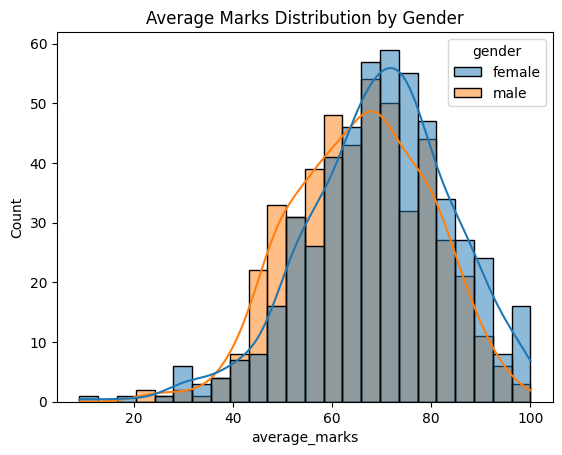

In [31]:
# create a histogram for the average marks taking hue as gender
sns.histplot(data=df, x='average_marks', hue='gender', kde=True)
plt.title('Average Marks Distribution by Gender')
plt.show()

### observation on average marks based on gender
female stundet got more average marks than the male


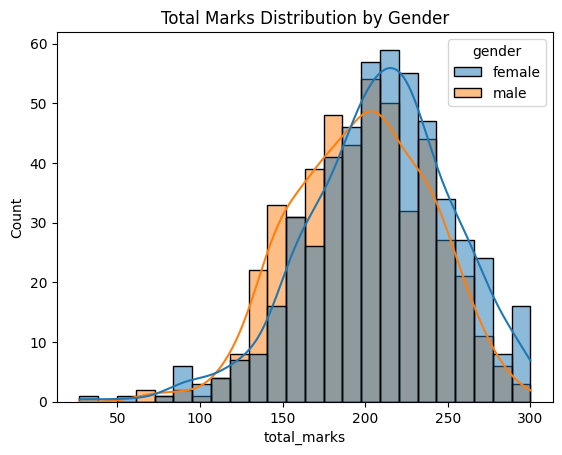

In [32]:
# with respect to toal score plot the  histogram
sns.histplot(data=df, x='total_marks', hue='gender', kde=True)
plt.title('Total Marks Distribution by Gender')
plt.show()

In [34]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


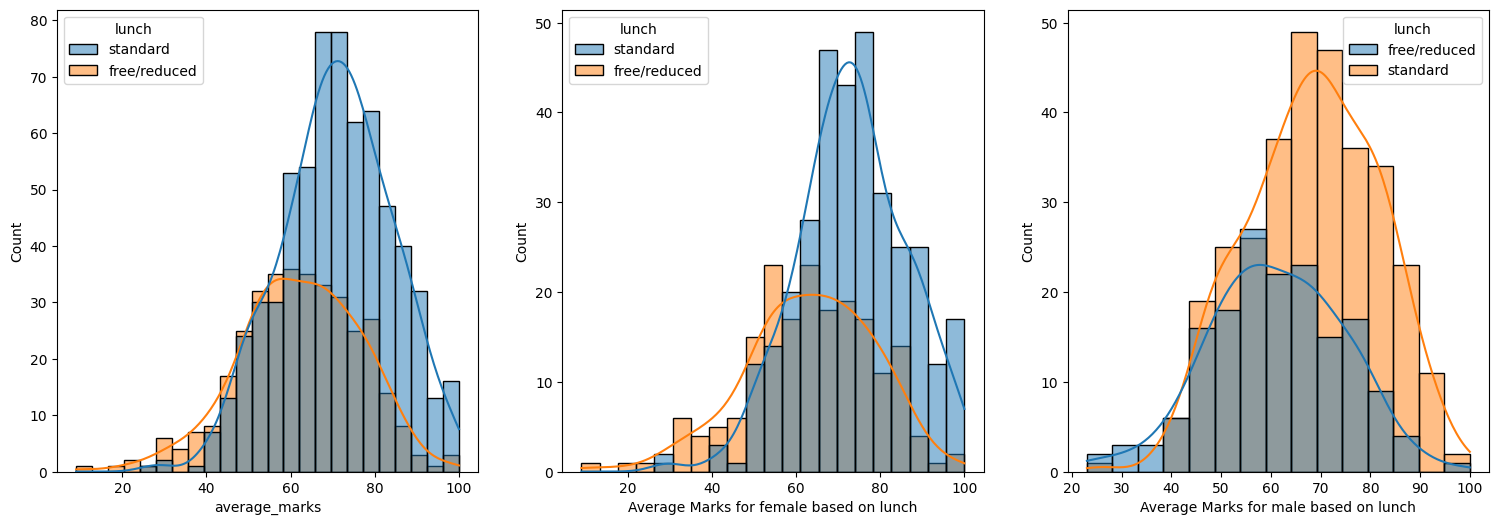

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_marks',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='lunch')
plt.xlabel('Average Marks for female based on lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='lunch')
plt.xlabel('Average Marks for male based on lunch')
plt.show()


## obervation

- standard lunch has more impact on the average result
- standard lunch make more marks than the free and reduced



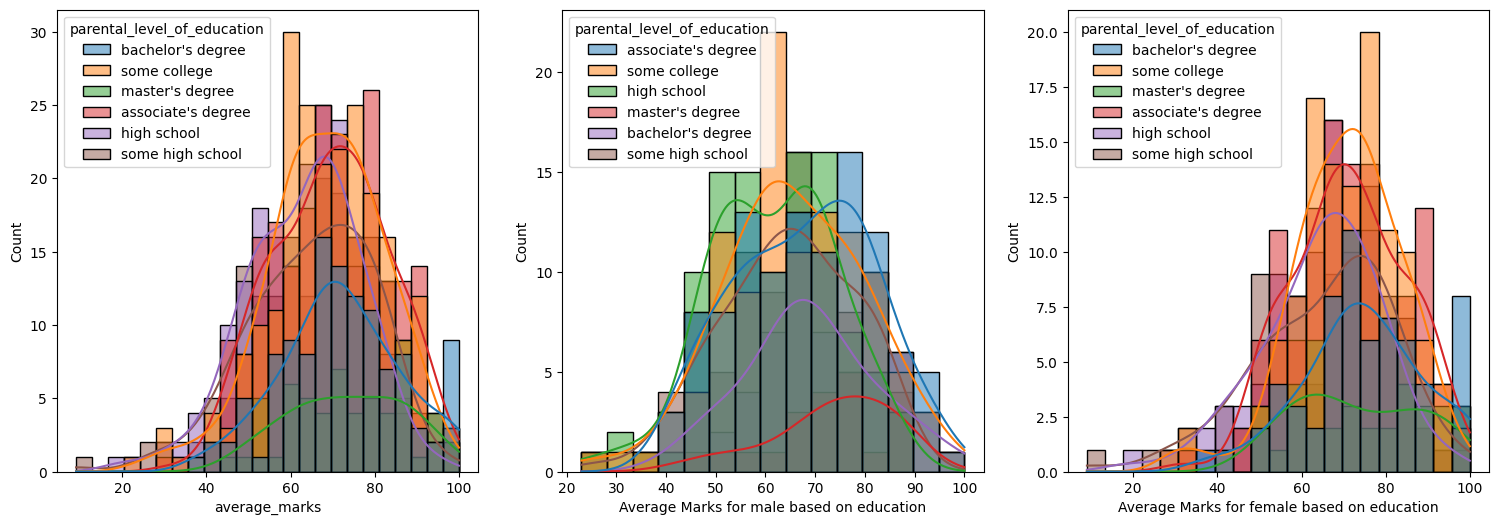

In [38]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.xlabel('Average Marks for male based on education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='parental_level_of_education')
plt.xlabel('Average Marks for female based on education')
plt.show()

### Observation
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

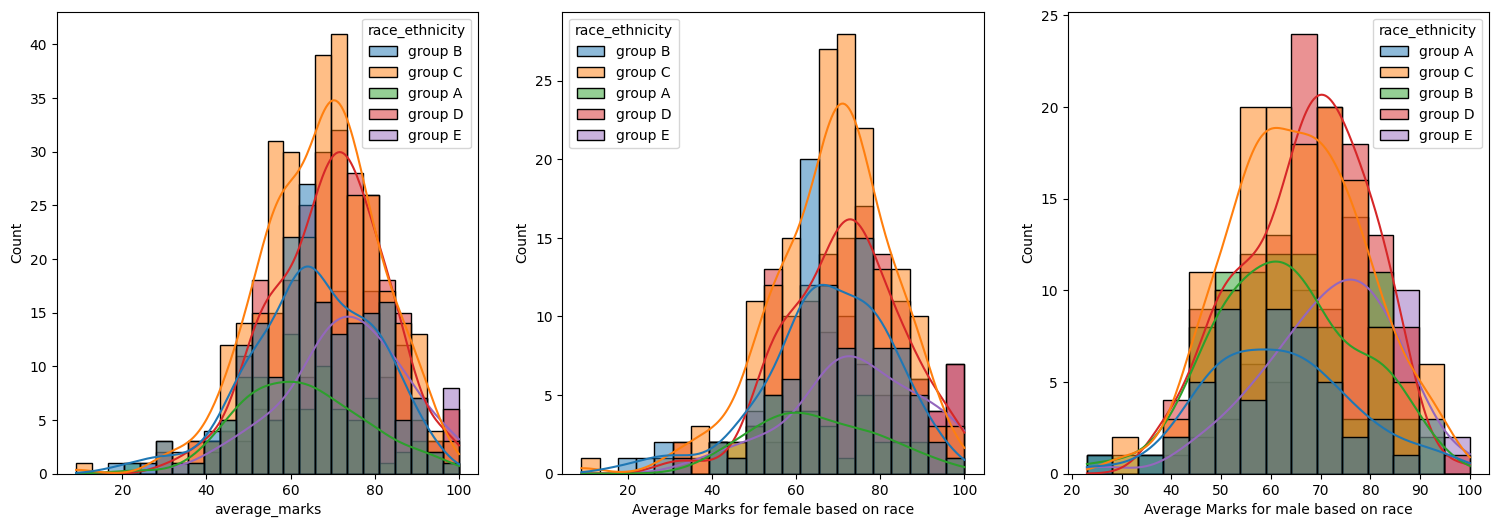

In [40]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_marks',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_marks',kde=True,hue='race_ethnicity')
plt.xlabel('Average Marks for female based on race')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_marks',kde=True,hue='race_ethnicity')
plt.xlabel('Average Marks for male based on race')
plt.show()

# maximum score

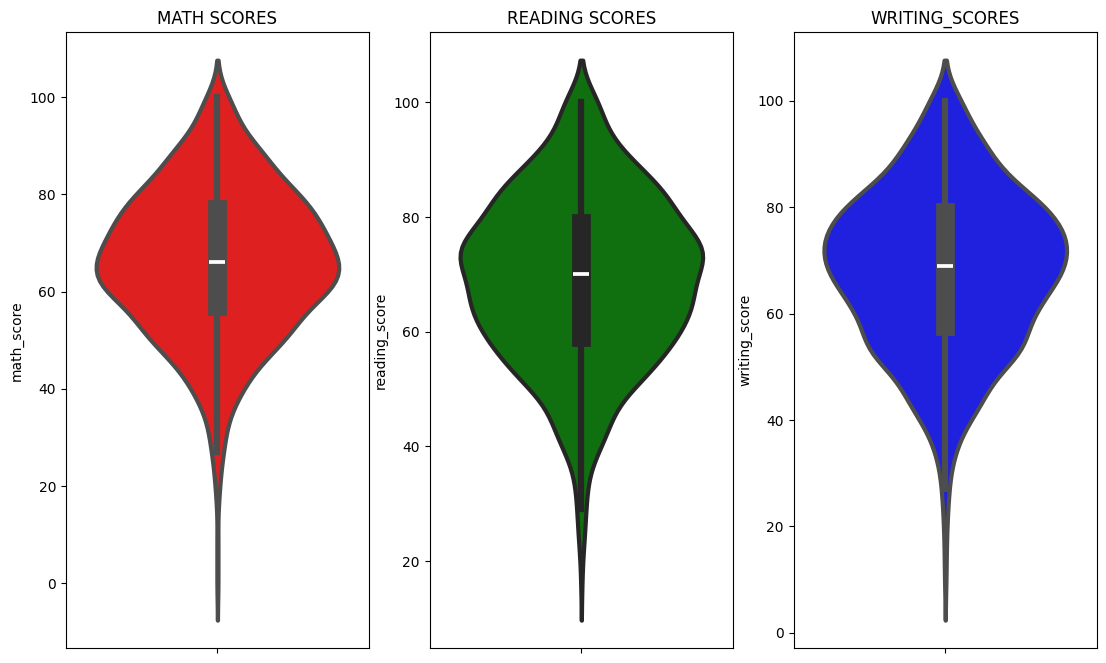

In [42]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING_SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

In [44]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_marks,average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


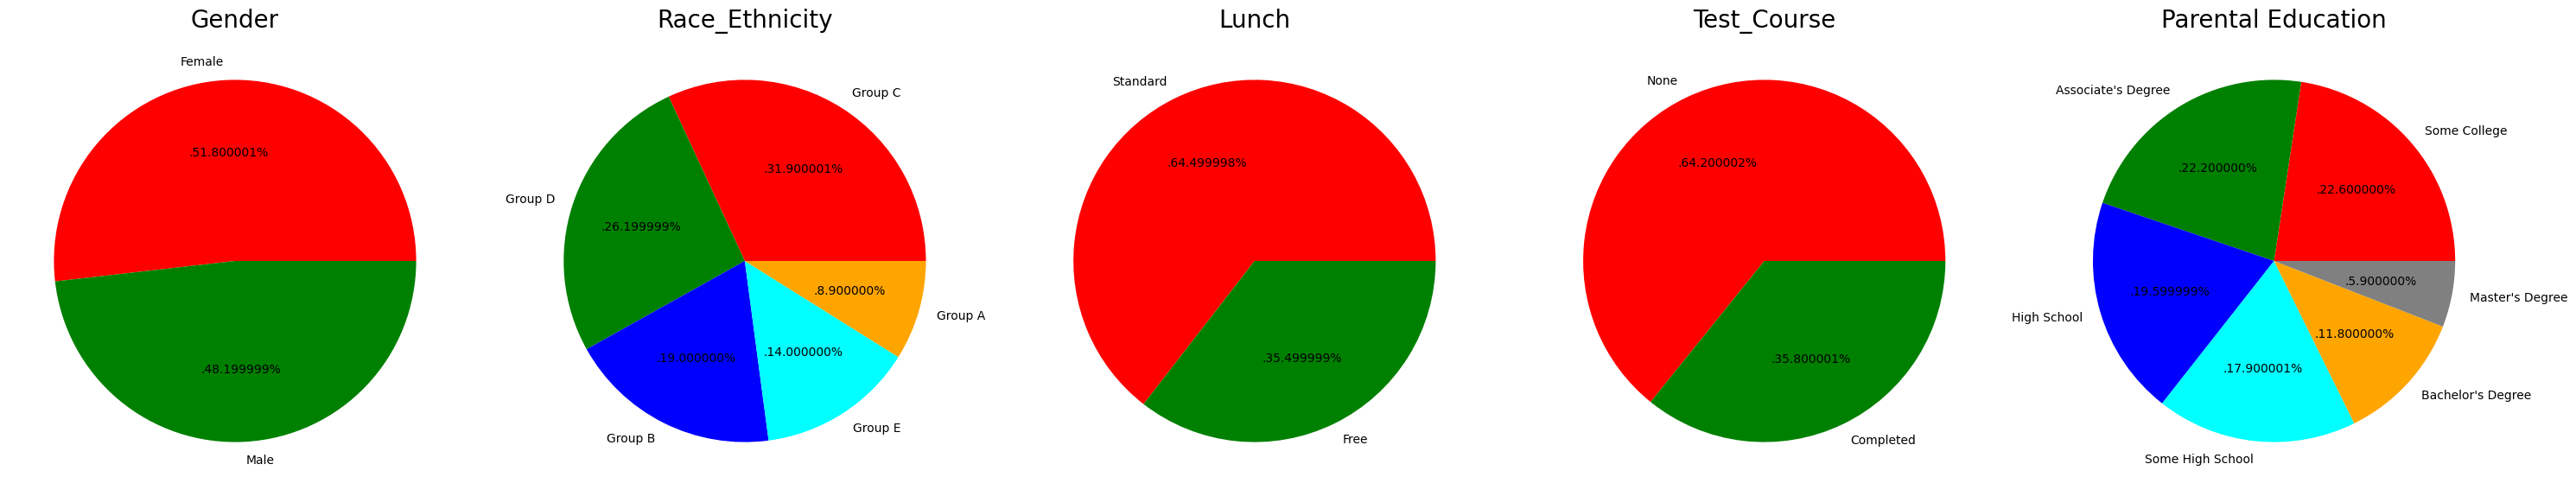

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

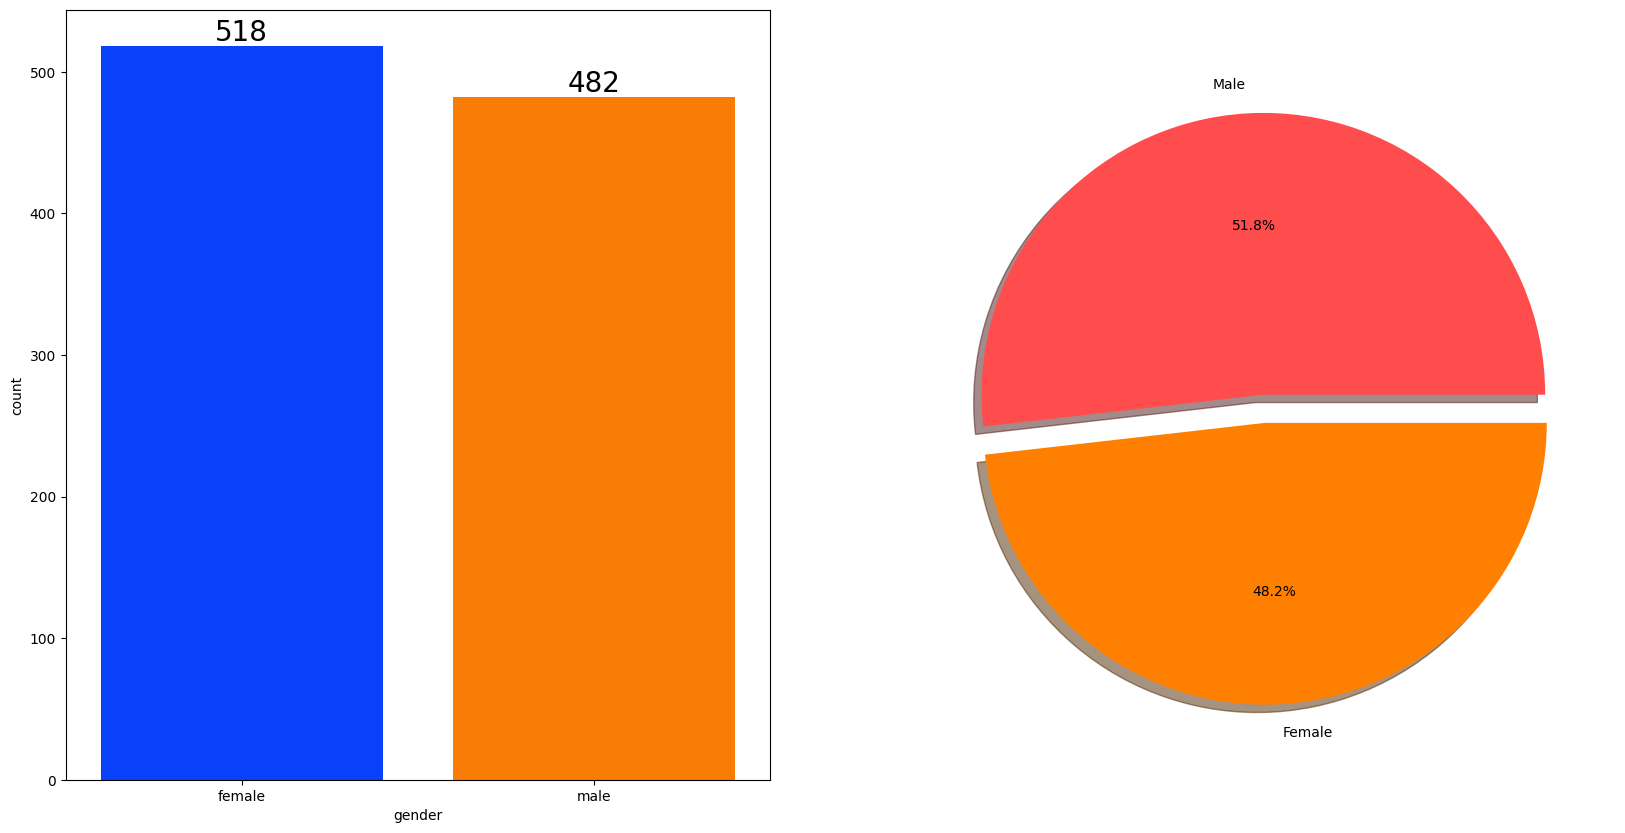

In [46]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

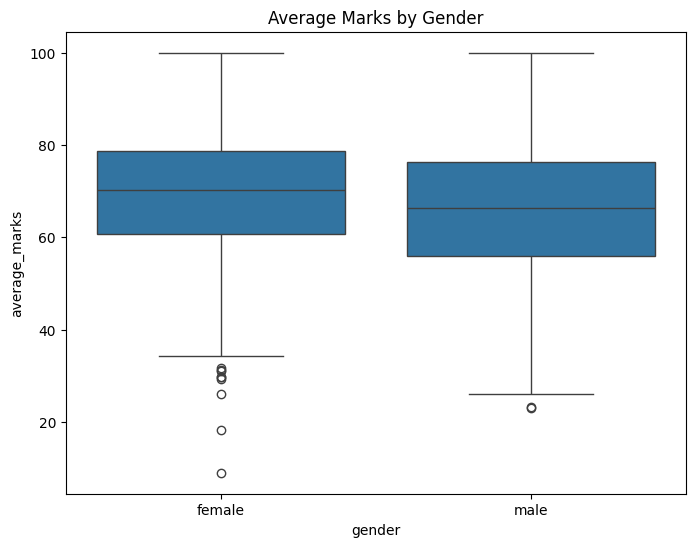

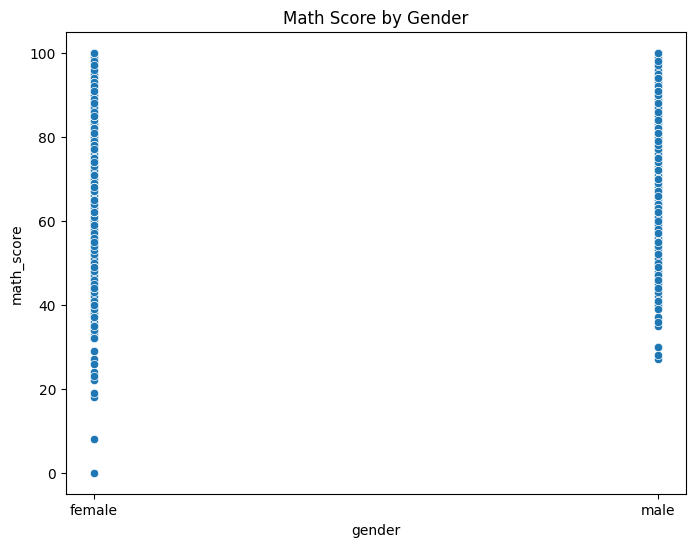

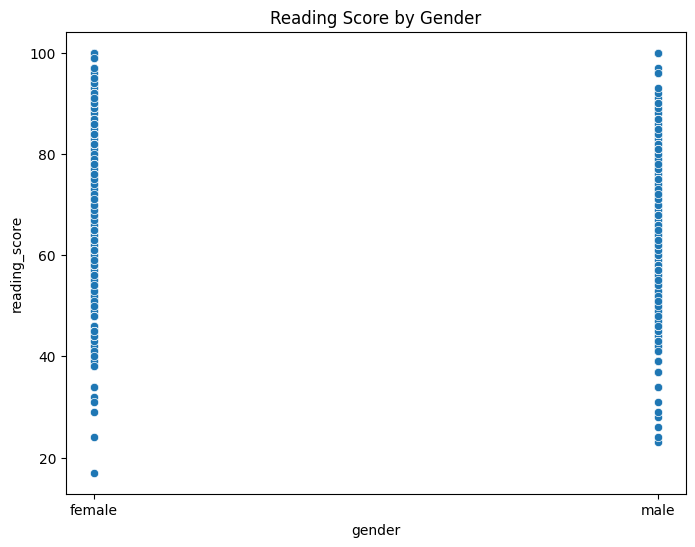

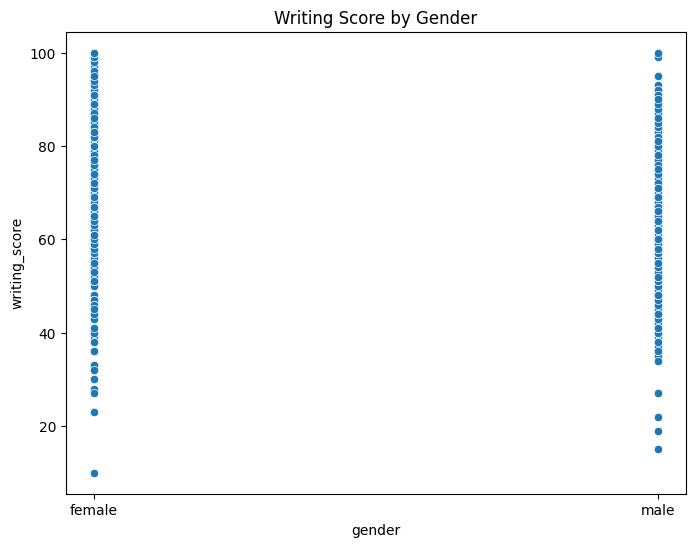

In [51]:
# prompt: #### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )   plot the graph

# Box plot to visualize the relationship between gender and average marks
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='average_marks', data=df)
plt.title('Average Marks by Gender')
plt.show()

# Scatter plot to visualize the relationship between gender and math score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='math_score', data=df)
plt.title('Math Score by Gender')
plt.show()

# Scatter plot to visualize the relationship between gender and reading score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='reading_score', data=df)
plt.title('Reading Score by Gender')
plt.show()

# Scatter plot to visualize the relationship between gender and writing score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='gender', y='writing_score', data=df)
plt.title('Writing Score by Gender')
plt.show()


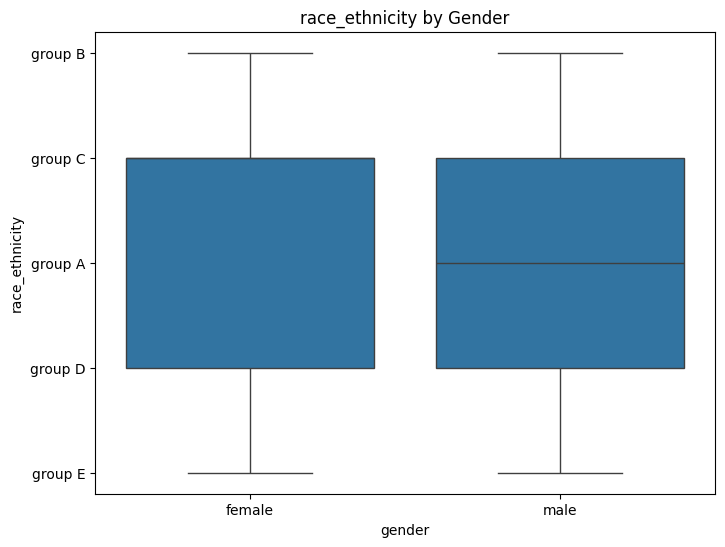

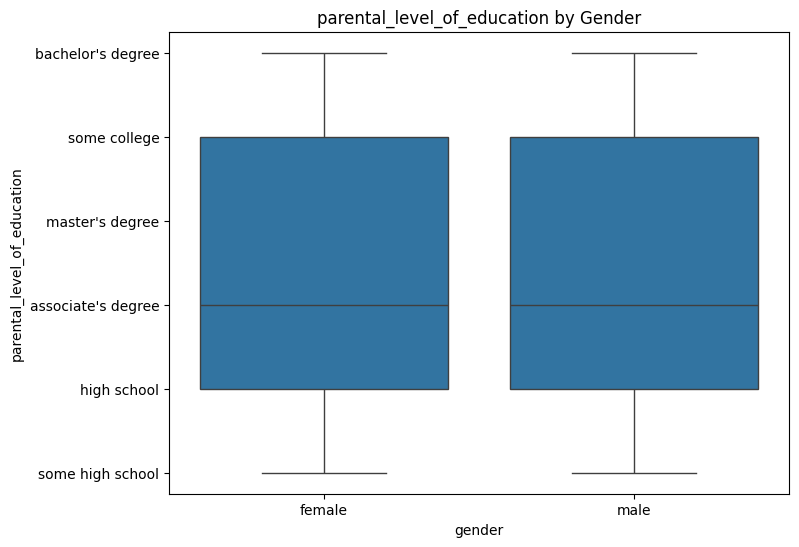

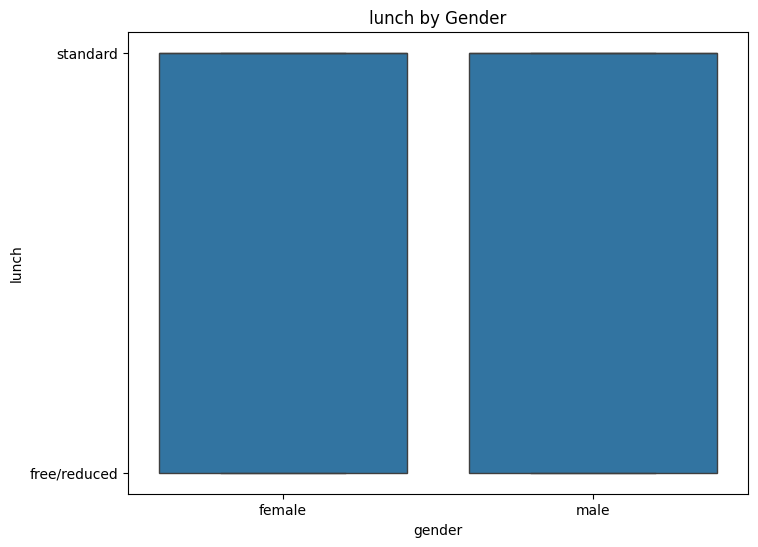

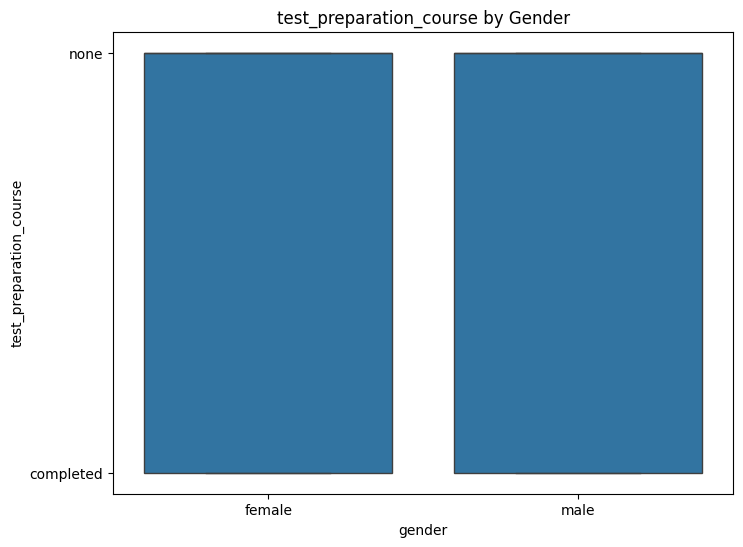

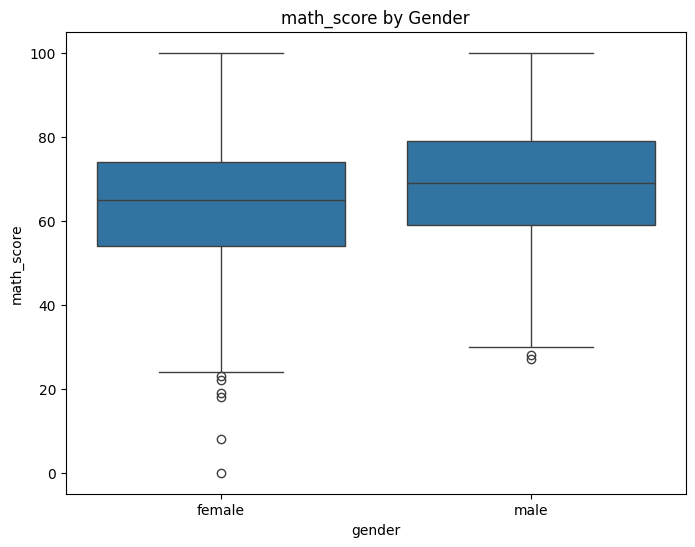

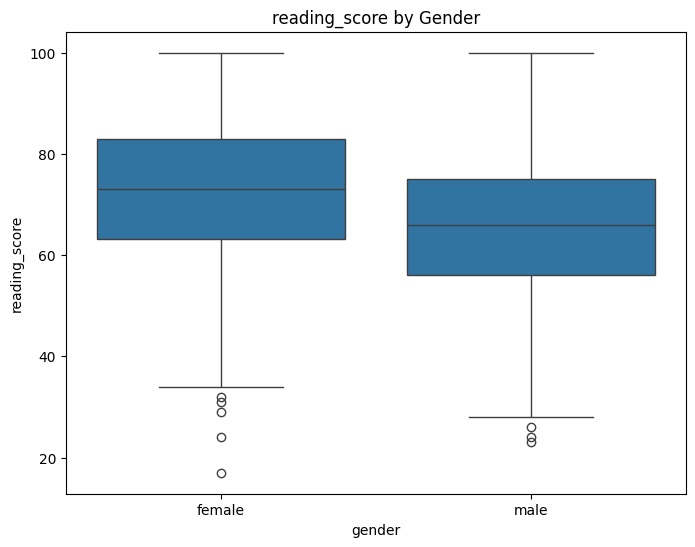

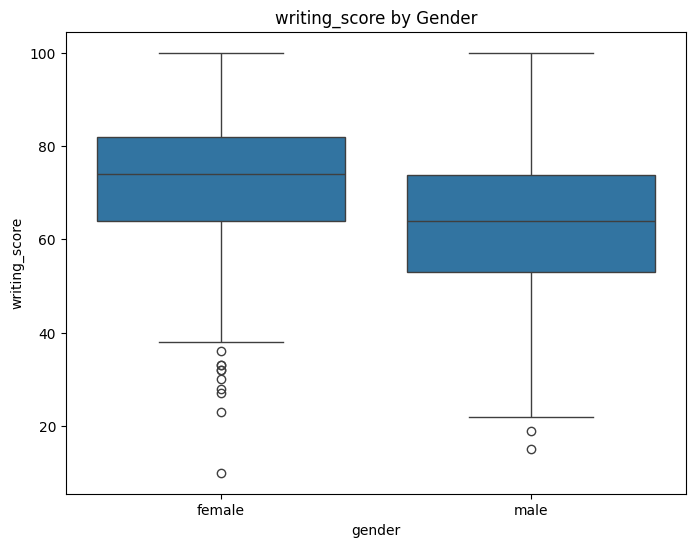

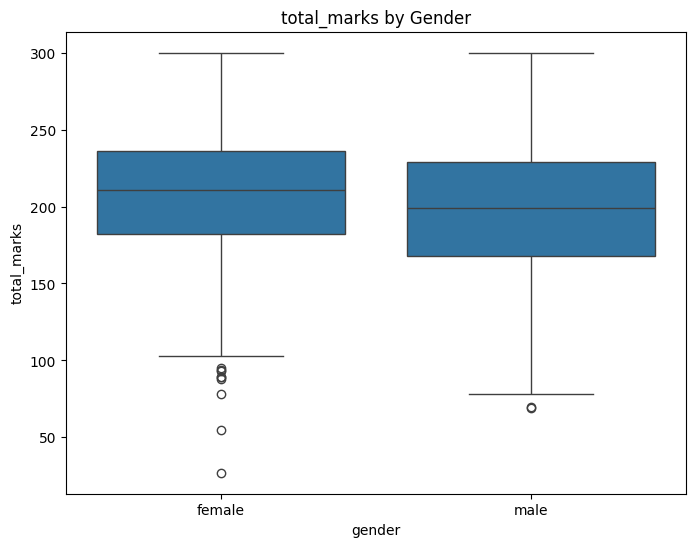

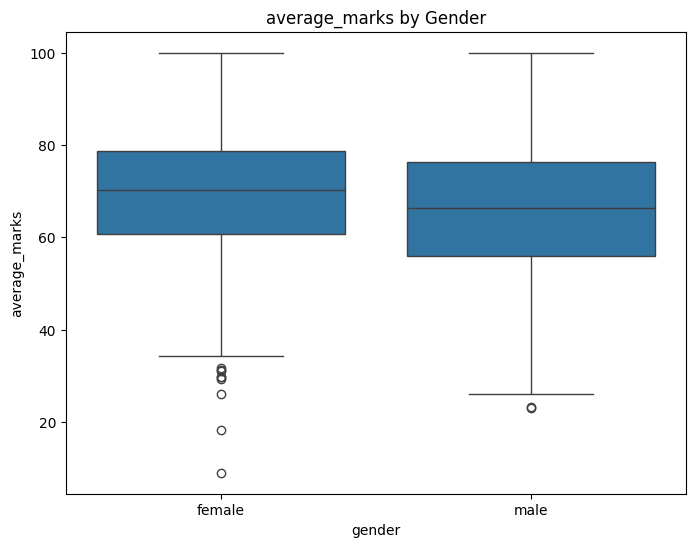

In [52]:
# prompt: plot all the bivirate analysis with all columns using the gender

# Bivariate analysis with all columns using gender
for col in df.columns:
  if col != 'gender':
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='gender', y=col, data=df)
    plt.title(f'{col} by Gender')
    plt.show()
